In [4]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

Using TensorFlow backend.


In [5]:
df = pd.read_csv('data.csv')
df.drop(["Unnamed: 32", "id"], axis=1, inplace=True)
df['diagnosis'] = df['diagnosis'].map({'M':1, 'B':0})

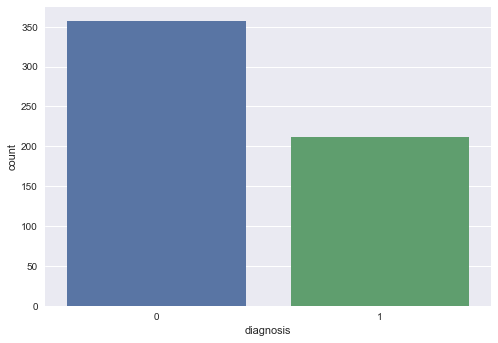

In [6]:
sns.countplot(df['diagnosis'], label='Count')
plt.show()

In [7]:
features_mean = list(df.columns[1:11])
features_se = list(df.columns[11:20])
features_worst = list(df.columns[21:31])

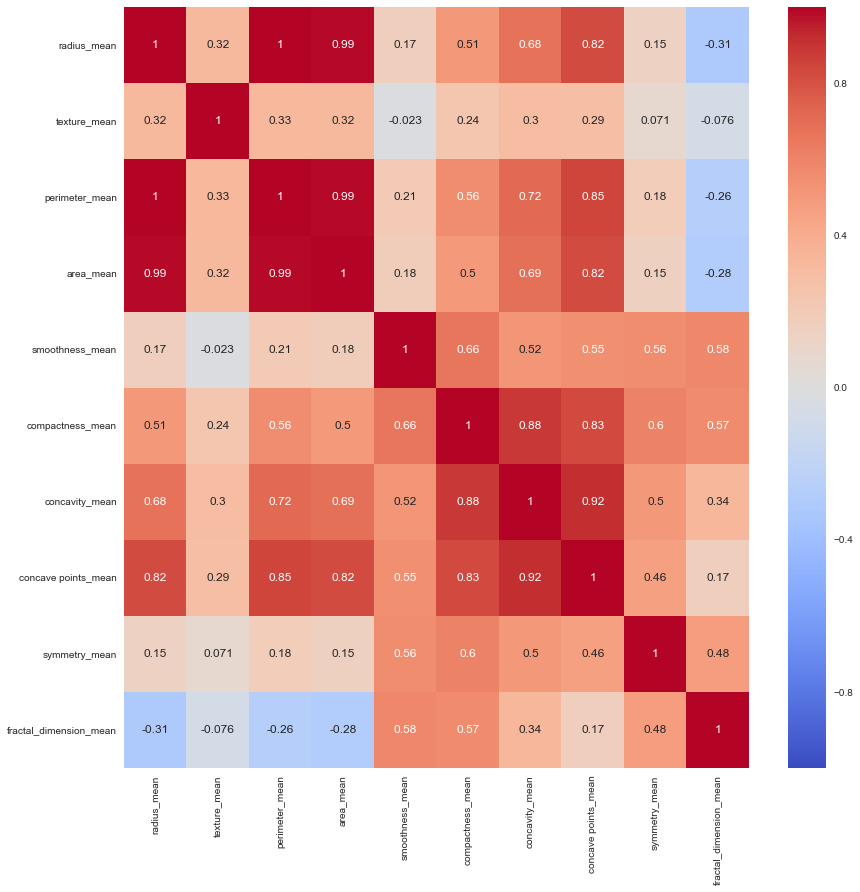

In [8]:
corr = df[features_mean].corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True, cmap='coolwarm', annot=True)
plt.show()

In [9]:
# tarin, test 데이터셋 분류
var = df.columns[1:]
target = to_categorical(df['diagnosis'])
X_train = df[var]
X_test = df[var][500:]


In [11]:
X_train = np.array(X_train)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

Train on 398 samples, validate on 171 samples
Epoch 1/50
398/398 [==============================] - 0s - loss: 0.4966 - acc: 0.8090 - val_loss: 0.3418 - val_acc: 0.9591
Epoch 2/50
398/398 [==============================] - 0s - loss: 0.2354 - acc: 0.9497 - val_loss: 0.1915 - val_acc: 0.9708
Epoch 3/50
398/398 [==============================] - 0s - loss: 0.1549 - acc: 0.9598 - val_loss: 0.1438 - val_acc: 0.9708
Epoch 4/50
398/398 [==============================] - 0s - loss: 0.1205 - acc: 0.9724 - val_loss: 0.1208 - val_acc: 0.9766
Epoch 5/50
398/398 [==============================] - 0s - loss: 0.1006 - acc: 0.9799 - val_loss: 0.1080 - val_acc: 0.9766
Epoch 6/50
398/398 [==============================] - 0s - loss: 0.0879 - acc: 0.9799 - val_loss: 0.1031 - val_acc: 0.9766
Epoch 7/50
398/398 [==============================] - 0s - loss: 0.0785 - acc: 0.9799 - val_loss: 0.0984 - val_acc: 0.9766
Epoch 8/50
398/398 [==============================] - 0s - loss: 0.0716 - acc: 0.9799 - val_l

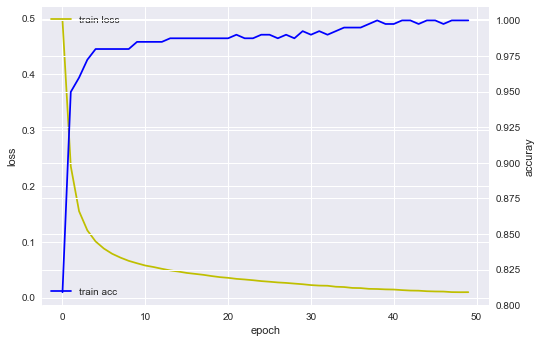

In [12]:
n_col = X_train.shape[1]
input_shape = (n_col,)

model = Sequential()
model.add(Dense(32, input_shape=input_shape, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

model.compile(optimizer='adam', loss='categorical_crossentropy',
             metrics=['accuracy'])

hist = model.fit(X_train, target, epochs=50, batch_size=8, validation_split=0.3)

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
acc_ax.plot(hist.history['acc'], 'b', label='train acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [13]:
from sklearn.metrics import confusion_matrix

confusion_matrix(X_train, target)

ValueError: Can't handle mix of continuous-multioutput and multilabel-indicator